# Final Assignment of IBM Statistics for Data Science with Python - Karthick Jayaraman

## Importing Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm

## Loading the Boston Housing Dataset

In [4]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


## Descriptive Statistics and Visualizations

### Boxplot for Median value of owner-occupied homes (MEDV)

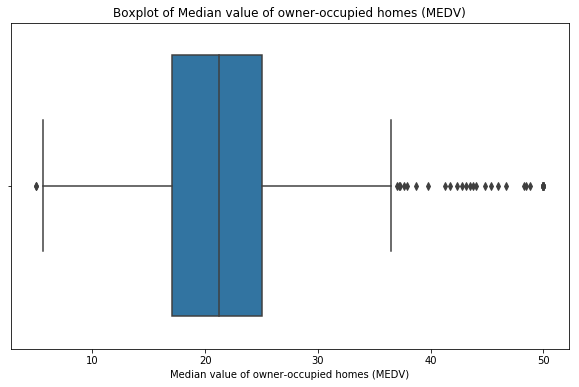

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['MEDV'])
plt.title('Boxplot of Median value of owner-occupied homes (MEDV)')
plt.xlabel('Median value of owner-occupied homes (MEDV)')
plt.show()

### Bar plot for the Charles river variable

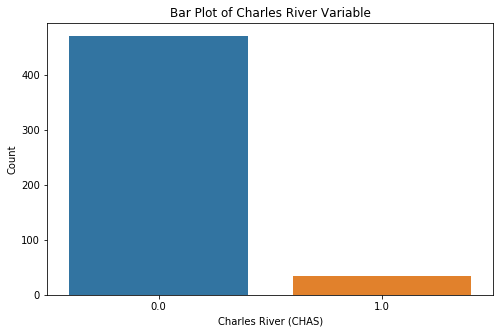

The histogram above shows that the majority of the houses are not near the Charles River


In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot of Charles River Variable')
plt.xlabel('Charles River (CHAS)')
plt.ylabel('Count')
plt.show()
print("The histogram above shows that the majority of the houses are not near the Charles River")

### Boxplot for MEDV vs AGE variable

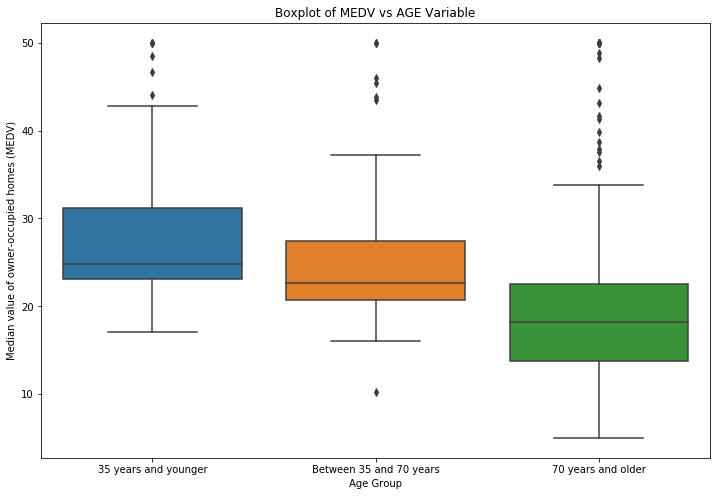

In [8]:
plt.figure(figsize=(12, 8))
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, np.inf], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])
sns.boxplot(x=boston_df['AGE_Group'], y=boston_df['MEDV'])
plt.title('Boxplot of MEDV vs AGE Variable')
plt.xlabel('Age Group')
plt.ylabel('Median value of owner-occupied homes (MEDV)')
plt.show()

### Scatter plot for Nitric oxide concentrations vs Proportion of non-retail business acres per town

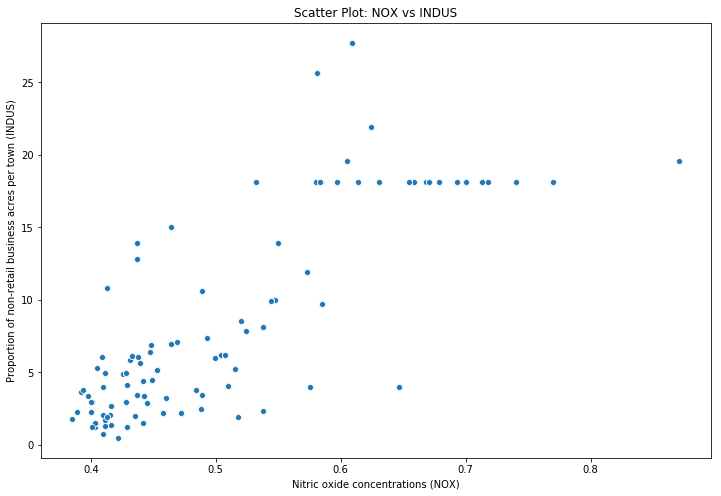

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Scatter Plot: NOX vs INDUS')
plt.xlabel('Nitric oxide concentrations (NOX)')
plt.ylabel('Proportion of non-retail business acres per town (INDUS)')
plt.show()

Values in the bottom-left indicates a strong relation between low Nitric oxide concentration and low proportion of non-retail business acres per town.

### Histogram for the pupil to teacher ratio variable using Matplotlib

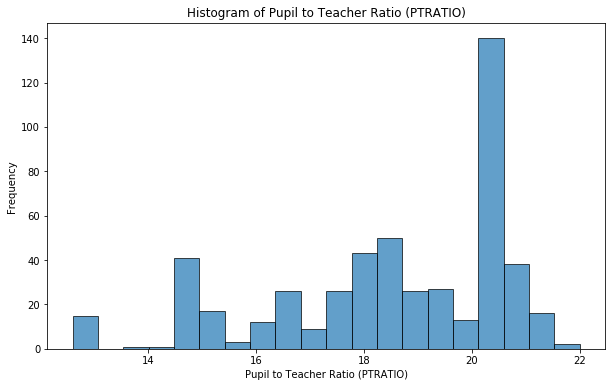

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(boston_df['PTRATIO'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('Pupil to Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

## Inferencial Statistics

### 1. Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

#### Hypothesis:
- H0: There is no significant difference in median values of houses between those bounded and not bounded by the Charles River.
- H1: There is a significant difference in median values.

#### Test:
- Independent Samples T-test

In [14]:
# 1. T-test for independent samples
t_stat, p_value_ttest = scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'], 
                                              boston_df[boston_df['CHAS'] == 0]['MEDV'],
                                             equal_var = True)
print(f"T-test p-value: {p_value_ttest}")

T-test p-value: 7.390623170519905e-05


#### Conclusion:
- p-value < 0.05, reject the null hypothesis. So, there is not a statistical difference in median value between houses those bounded and not bounded by the Charles River

### 2. Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built before 1940 (AGE)? (ANOVA)

#### Warning: Since it was unable to find houses before 1940 as we dont know when the dataset is prepared. Is it 1996 whent he dataset was released or 2023 when we are doing the test. I will do a blanket ANOVA for AGE vs MEDV

#### Hypothesis:
- H0: There is no difference in median values of houses for different age groups.
- H1: There is a difference in median values.

#### Test:
- Analysis of Variance (ANOVA)

In [22]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


#### Conclusion:
- p-value < 0.05, reject the null hypothesis. There is statistical difference in Median values of houses (MEDV) for each proportion of owner occpied units built prior to 1940

### 3. Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town? (Pearson Correlation)

#### Hypothesis:
- H0: There is no correlation between Nitric oxide concentrations and non-retail business acres.
- H1: There is a correlation.

#### Test:
- Pearson Correlation

In [17]:
correlation, p_value_corr = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation p-value: {p_value_corr}")

Pearson Correlation p-value: 7.913361061242082e-98


#### Conclusion:
- If p-value < 0.05, reject the null hypothesis and there is correlation between Nitric oxide concentrations and non-retail business acres.

### 4. What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression analysis)

#### Hypothesis:
- H0: The weighted distance has no impact on the median value of owner-occupied homes.
- H1: The weighted distance has an impact.

#### Test:
- Multiple Linear Regression

In [18]:
# 4. Multiple Linear Regression
from statsmodels.formula.api import ols

# Assuming 'MEDV' is the dependent variable and 'DIS' is the independent variable
model = ols('MEDV ~ DIS', data=boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.21e-08
Time:                        09:27:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0

#### Conclusion:
- Analyze coefficients and their significance. The coeffiecient of 'DIS' of 1.0916 indicates that an additional weighted distance to the 5 empolyment centers in boston increases of 1.0916 the median value of owner occupied homes